In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mesh(a, b, Nt):
    """
    Funcion para definir la malla
    """
    ht = (b-a) / Nt
    return ht

In [3]:
def f(t,y):
    """
    Funcion para aproximar la solucion del problema
    """
    return y - t**2 + 1

In [4]:
def Exacta(t):
    """
    Funcion para calcular la solucion exacta
    """
    return (t+1)**2 - 0.5 * np.exp(t)

In [5]:
def Euler(f, t, w, ht):
    """
    Implementacion del metodo de Euler
    """
    for i, val in enumerate (w[0: -1]):
        w[i+1] = w[i] + ht * f(t[i], w[i])
        t[i+1] = t[0] + (i+1) * ht

In [6]:
def RK2(f, t, w, ht):
    """
    Implementacion del metodo de Runge-Kutta de orden 2
    """
    for i, val in enumerate (w[0:-1]):
        k1 = ht * f(t[i], w[i])
        w[i+1] = w [i] + ht * f(t[i] + ht * 0.5 ,w[i] + k1 * 0.5)
        t[i+1] = a + (i+1) * ht

In [7]:
def RK3(f, t, w, ht):
    """
    Implementacion del metodo de Runge-Kutta de orden 3
    """
    for i, val in enumerate(w[0:-1]):
        k1 = ht * f(t[i],w[i])
        k2 = ht * f(t[i] + ht /3 ,w[i] + k1 / 3)
        k3 = ht * f(t[i] + 2 * ht / 3 , w[i] + 2 * k2 / 3)
        w[i+1] = w[i] + (k1 + 3 * k3)/ 4
        t[i+1] = a + (i+1) * ht

In [8]:
def RK4(f, t, w, ht):
    """
    Implementacion del metodo de Runge-Kutta de orden 4
    """
    for i, val in enumerate (w[0:-1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht /2 ,w[i] + k1 / 2)
        k3 = ht * f(t[i] + ht /2 ,w[i] + k2 / 2)
        k4 = ht * f(t[i] + ht , w[i] + k3)
        w[i+1] = w[i] + (k1 + 2* k2 +2* k3 + k4) / 6
        t[i+1] = a + (i+1) * ht

In [64]:
"""
Parametros iniciales del problema 
Donde se va modificando Nt para cada caso
"""
Nt = 32 # 4 , 8 , 16 , 32
a = 0
b = 4
ht = mesh(a,b,Nt)
y0 = 0.5

In [65]:
"""
Definiendo los vectores
"""
t = np.linspace(a,b ,Nt+1)
y_eul = np.zeros(Nt+1);
y_rk2 = np.zeros(Nt+1)
y_rk3 = np.zeros(Nt+1)
y_rk4 = np.zeros(Nt+1)

In [66]:
"""
Condiciones iniciales
"""
y_eul [0]= y0
y_rk2 [0]= y0
y_rk3 [0]= y0
y_rk4 [0]= y0

In [67]:
"""
Comparacion de metodos
"""
Euler(f, t, y_eul, ht)
RK2(f, t, y_rk2, ht)
RK3(f, t, y_rk3, ht)
RK4(f, t, y_rk4, ht)

In [68]:
"""
Calculando el error
"""
yp = Exacta(t)
e_eul = np.abs(yp - y_eul)
e_rk2 = np.abs(yp - y_rk2)
e_rk3 = np.abs(yp - y_rk3)
e_rk4 = np.abs(yp - y_rk4)

In [69]:
n_error_eul = np.linalg.norm(e_eul, 2)
n_error_rk2 = np.linalg.norm(e_rk2, 2)
n_error_rk3 = np.linalg.norm(e_rk3, 2)
n_error_rk4 = np.linalg.norm(e_rk4, 2)

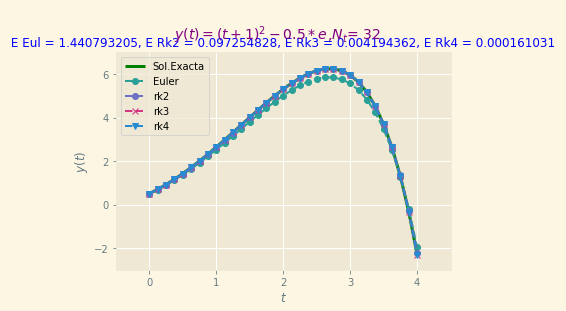

In [70]:
"""
Implementacion de la graficacion para los resultados de 
las aproximaciones obtenidas en cada caso
"""
Ecuacion = '$y(t) = (t+1)^2 - 0.5 * e^{\t}$,' + '$N_t$' + '= {} '.format(Nt)
Error = '\n\n E Eul = {:10.9f}, E Rk2 = {:10.9f}, E Rk3 = {:10.9f}, E Rk4 = {:10.9f} '.format(n_error_eul, n_error_rk2, n_error_rk3, n_error_rk4)

plt.style.use(['Solarize_Light2'])
plt.suptitle(Ecuacion, fontsize =14, color ='purple')

plt.plot(t, yp, 'g-', lw =3, label = 'Sol.Exacta')
plt.plot(t, y_eul, 'C9o--', label = 'Euler')
plt.plot(t, y_rk2, 'C7o--', label = 'rk2')
plt.plot(t, y_rk3, 'C6x--', label = 'rk3')
plt.plot(t, y_rk4, 'C8v--', label = 'rk4')
plt.title(Error, fontsize =12 , color='blue')
plt.xlim(-0.5,t[-1]+0.5)
plt.ylim(-3.0,7.0)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend(loc ='upper left', ncol=1 , framealpha=0.75, fancybox=True ,fontsize =10)
plt.grid(color ='w')
plt.savefig('Ejercicio 4_Nt_{}.pdf'.format(Nt))
plt.show()

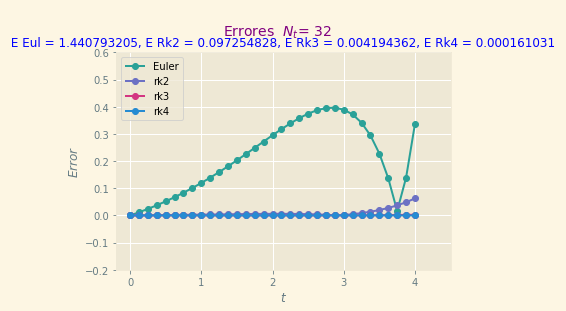

In [72]:
"""
Implementacion de la graficacion para los resultados de 
los errores obtenidas en cada caso
"""
Titulo = 'Errores  ' + '$N_t$' + '= {} '.format(Nt)

plt.style.use(['Solarize_Light2'])
plt.suptitle(Titulo, fontsize =14, color ='purple')

plt.plot(t, e_eul, 'C9o-', label = 'Euler')
plt.plot(t, e_rk2, 'C7o-', label = 'rk2')
plt.plot(t, e_rk3, 'C6o-', label = 'rk3')
plt.plot(t, e_rk4, 'C8o-', label = 'rk4')
plt.title(Error, fontsize =12 , color='blue')
plt.xlim(-0.2,t[-1]+0.5)
plt.ylim(-0.2,0.6)
plt.xlabel('$t$')
plt.ylabel('$Error$')
plt.legend(loc ='upper left', ncol=1 , framealpha=0.75, fancybox=True ,fontsize =10)
plt.grid(color ='w')
plt.savefig('Ejercicio 4_Nt_{}.pdf'.format(Nt))
plt.show()

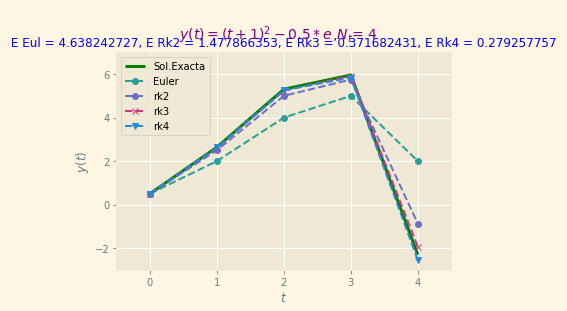

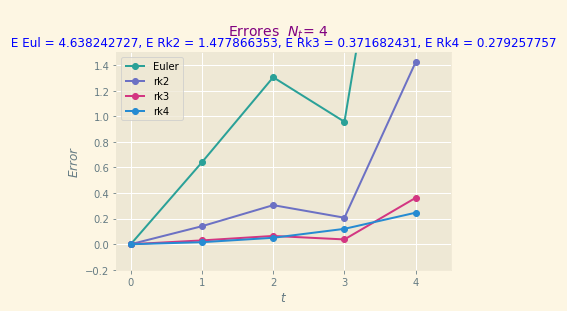

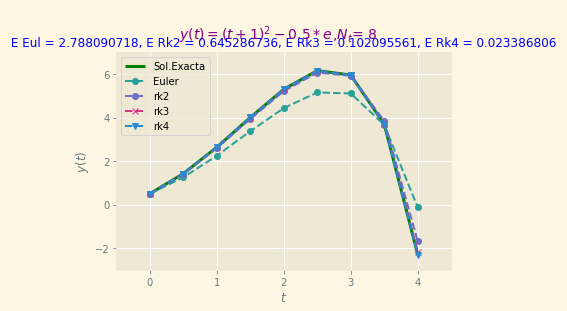

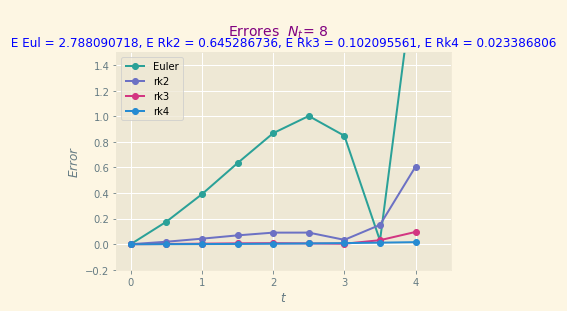

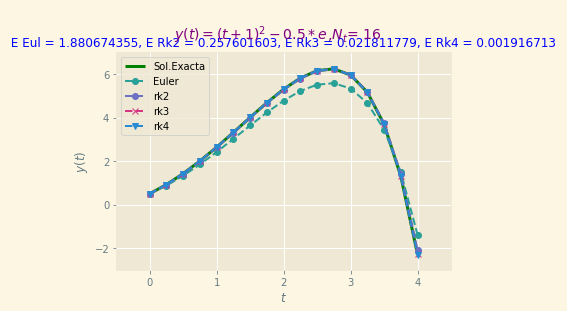

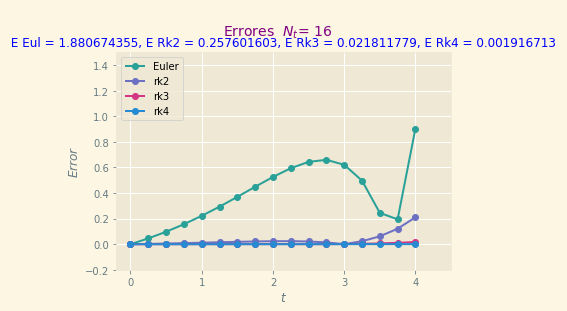

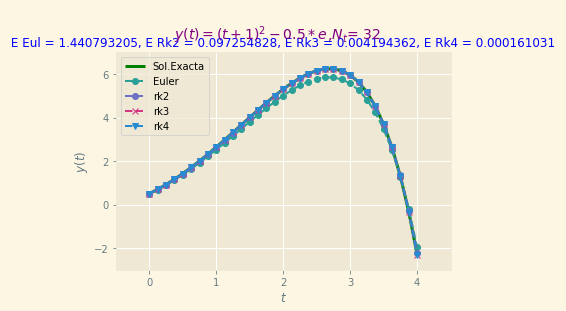

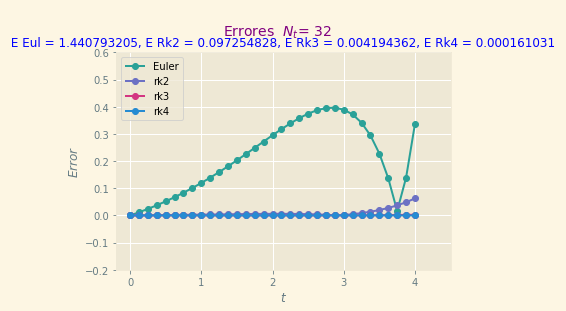